** Monte carlo based valuation of European option **

dSj = μj Sj dt + sigma Sj dZj


3 different approaches could be used
1. Pure Python
2. Vectorized NumPy
3. Fully Vectorized NumPy

We will use Euler descretization of BSM SDE

Model is parameterize by

S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2

In [1]:
def bsm_call_value(S0, K, T, r, sigma):
    from math import log, sqrt, exp
    from scipy import stats
    
    S0 = float(S0)
    d1 = (log(S0/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0/K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - (K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [2]:
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2

In [3]:
C0 = bsm_call_value(S0, K, T, r, sigma)
C0

8.0213522351431763

** PURE PYTHON MONTE CARLO SIMULATION OF CALL PRICES **

In [4]:
from time import time
from math import exp, sqrt, log
from random import gauss, seed

seed(20000)
t0 = time()
#additional parameters
M = 50 # number of steps
dt = T / M
I = 250000 # number of paths

# Simulating I paths with M time steps
S = []


for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0) # gaussian shock
            St = path[t-1] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * z) # Euler Descretization
            path.append(St)
    S.append(path)

call_value = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I
tpy = time()-t0

print('European Option Value %7.3f' % call_value)
print('Duration in seconds %7.3f' % tpy)

European Option Value   7.999
Duration in seconds  20.097


**Vectorization with NumPy**


In [6]:
import math
import numpy as np
from time import time

np.random.seed(200000)
t0 = time()

# Parameters
S0 = 100.; K -105.; T =1.0; r = 0.05; sigma =0.2
M = 50; dt = T /M; I = 250000

# Simulating I Paths with M time steps
S = np.zeros((M + 1, I))
S[0] = S0

for t in range(1, M+1):
    z = np.random.standard_normal(I) # pseudorandom numbers
    S[t] = S[t-1] * np.exp((r-0.5 * sigma ** 2) * dt
                        + sigma * math.sqrt(dt) * z)

call_value = math.exp(-r * T) * np.sum(np.maximum(S[-1] -K, 0)) / I
tnpy = time()-t0

print('European Option Value %7.3f' % call_value)
print('Duration in seconds %7.3f' % tnpy)

European Option Value   8.050
Duration in seconds   0.656



** Full Vectorization with Log Euler Scheme **

In [9]:
import math
from numpy import *
from time import time

random.seed(20000)
t0 = time()


# Parameters
S0 = 100.; K -105.; T =1.0; r = 0.05; sigma =0.2
M = 50; dt = T /M; I = 250000

# simulating I paths with M time steps
S = S0 * exp(cumsum(( r - 0.5 * sigma ** 2) * dt
                   + sigma * math.sqrt(dt)
                   * random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

call_value = math.exp(-r * T ) * sum (maximum(S[-1]-K, 0)) / I
tnpyl = time()-t0

print('European Option Value %7.3f' % call_value)
print('Duration in seconds %7.3f' % tnpyl)

European Option Value   8.166
Duration in seconds   0.780


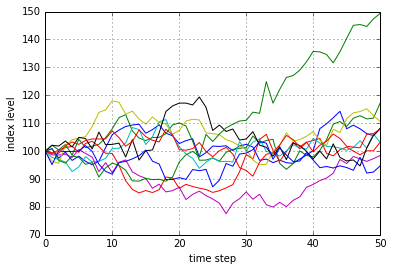

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')


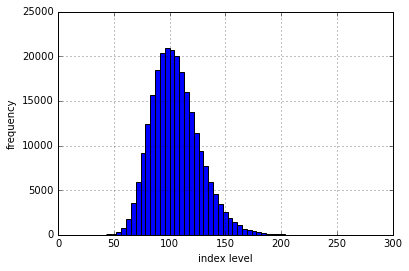

In [12]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

(0, 50000)

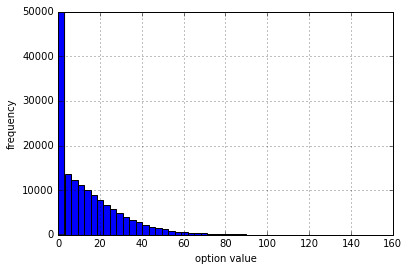

In [13]:
plt.hist(np.maximum(S[-1]-K, 0), bins=50)
plt.grid(True)
plt.xlabel('option value')
plt.ylabel('frequency')
plt.ylim(0, 50000)

In [14]:
S[-1] # final values

array([ 108.02208929,  117.19970121,  103.16926873, ...,  181.00965828,
         91.1431122 ,  159.00478614])

In [15]:
# majority of the call options expires worthless
sum(S[-1] < K)

133533